In [41]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import networkx as nx
import matplotlib.pyplot as plt
import shap
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pickle
from sklearn.ensemble import AdaBoostClassifier

In [10]:
def split(r, mat):
    i = int(len(mat) * r)

    return mat[:i], mat[i:]


def get_data():
    mat = pd.read_csv("../data/raw/matomo.csv", dtype=np.float32)

    return mat


def train_test(train, test):
    x_train = train.drop(["INDISPONIBILIDADE"], axis=1)
    y_train = train[["INDISPONIBILIDADE"]]

    x_test = test.drop(["INDISPONIBILIDADE"], axis=1)
    y_test = test[["INDISPONIBILIDADE"]]

    return x_train, y_train, x_test, y_test

In [11]:
print("Reading data")
mat = get_data()
print("Spliting the data into train/test with 75/25 proportion")
train, test = split(0.75, mat)
print("Spliting the data into x and y features")
x_train, y_train, x_test, y_test = train_test(train, test)

Reading data
Spliting the data into train/test with 75/25 proportion
Spliting the data into x and y features


In [12]:
def filter(x_train, x_test):
    print("Filtering")
    with open("../data/params/features.pkl", "rb") as inp:
        features = pickle.load(inp)
    x_train = x_train[features]
    x_test = x_test[features]

    return x_train, x_test

x_train, x_test = filter(x_train, x_test)

Filtering


In [95]:
test_shuffle = x_test.sample(frac=0.1, random_state=1)

In [92]:
filename = '../models/svm_model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)

In [96]:
# Instancie um objeto KernelExplainer com o modelo SVC e os dados
explainer = shap.Explainer(model.predict, test_shuffle)
# Calcular os valores SHAP para todo o dataset
shap_values = explainer(test_shuffle)


In [ ]:
# Salvar o modelo em disco
filename = '../data/params/explainer.pkl'
with open(filename, 'wb') as file:
    pickle.dump(explainer, file)

# Salvar o modelo em disco
filename = '../data/params/shap_values.pkl'
with open(filename, 'wb') as file:
    pickle.dump(shap_values, file)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


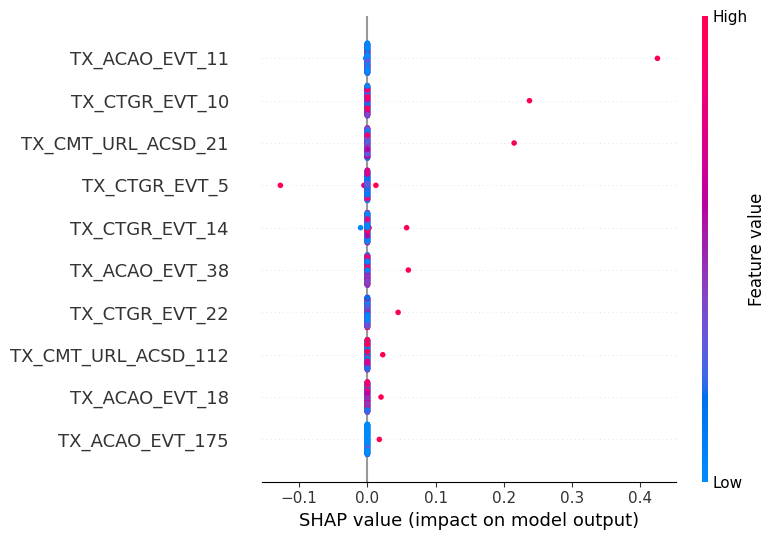

In [70]:
shap.summary_plot(shap_values, test_shuffle, max_display=10)

In [83]:
shap.plots.violin(shap_values)

AttributeError: 'Explanation' object has no attribute 'expected_value'

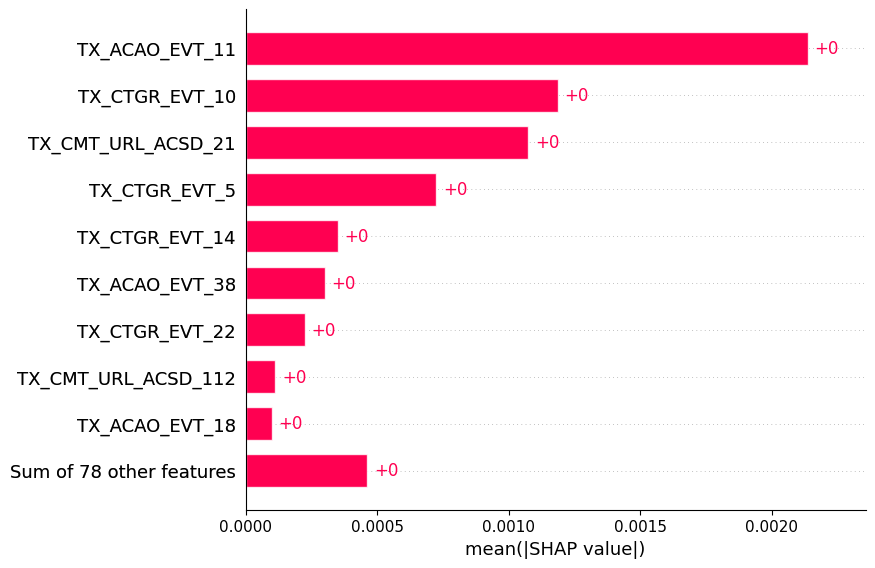

In [72]:
shap.plots.bar(shap_values, max_display=10)

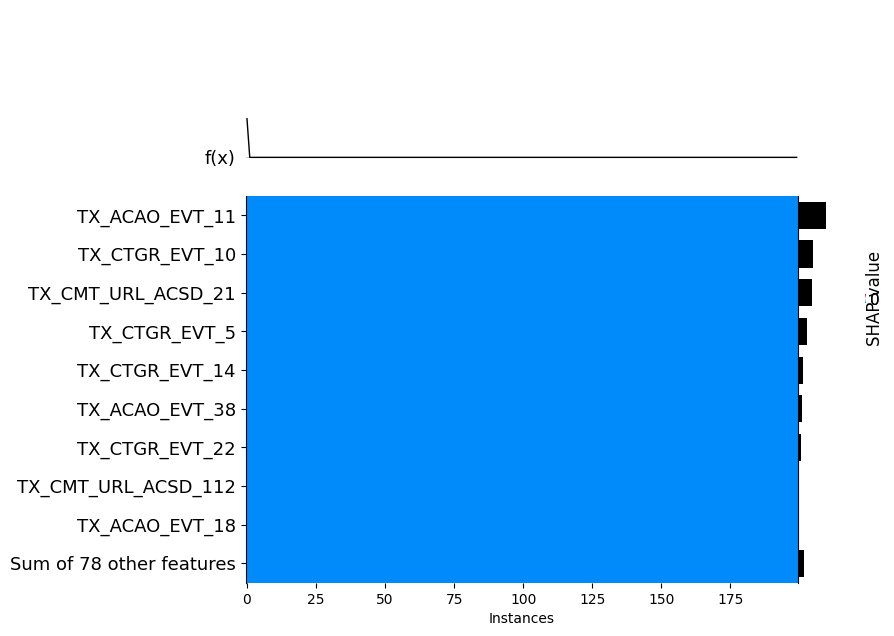

In [82]:
shap.plots.heatmap(shap_values, max_display=10)

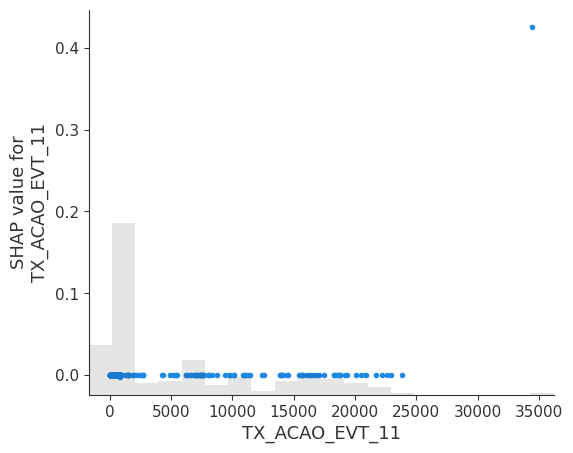

In [79]:
shap.plots.scatter(shap_values[:, "TX_ACAO_EVT_11"],)